# Bài 9: Thực hành về Học máy

## I. QUY TRÌNH TỔNG QUAN

Một bài toán sử dụng học máy có thể chia thành 3 bước chính dưới đây:

- **Bước 1: Thu thập dữ liệu**. Dữ liệu được thu thập càng nhiều càng tốt. Đối với học máy có giám sát, dữ liệu thu thập phải chứa kết quả bạn muốn dự đoán và thông tin bổ sung (các thông tin đặc trưng) để từ đó đưa ra dự đoán.

- **Bước 2: Huấn luyện mô hình**. Nhập các thông tin thu thập trên vào thuật toán máy học để tạo mô hình đáp ứng bài toán đưa ra.

- **Bước 3: Sử dụng mô hình dự đoán với dữ liệu mới**. Tích hợp mô hình vào một sản phẩm hoặc quy trình.

Trong thực tế, dữ liệu chúng ta có đôi khi không phải từ 1 nguồn mà từ rất nhiều nguồn khác nhau tổng hợp về 1 nguồn rồi xử lý dữ liệu rồi mới có thể huấn luyện được. Dưới đây là 1 hình ảnh ví dụ tổng quan mở rộng quy trình 3 bước cơ bản phía trên.

![](./img/flow2.png)

Phần tiếp theo, ta sẽ cũng nhau thực hành làm quen với bài toán học máy có giám sát thông qua bài toán phân loại giống hoa Iris.

## II. THỰC HÀNH

![](https://scikit-learn.org/stable/_static/ml_map.png)

Các bạn mới làm quen với Học máy có thể tham khảo lộ trình trong ảnh trên. 

### 0. Cài đặt

Trong buổi học này thì mình sẽ làm quen và thực hành chủ yếu trên scikit-learn API, một thư viện phổ biến khi làm việc với học máy ở tầm sơ và trung cấp. Để cài đặt thư viện, ta sử dụng câu lệnh quen thuộc dưới đây.

```python
!pip install scikit-learn
```

Ta sẽ import 1 số thư viện cần thiết dưới đây để phục vụ cho bài thực hành.

In [2]:
!pip install scikit-learn

     |████████████████████████████████| 7.9 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 12.3 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### 1. Bài toán

Chúng ta sẽ sử dụng tập dữ liệu Iris, chứa thông tin về ba giống hoa Iris khác nhau: Iris Versicolor, Iris Virginica, Iris Setosa với các phép đo của bốn biến: chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa, chiều rộng cánh hoa. Mục đích của bài toán là để phân loại hoa Iris giữa ba loài (setosa, versicolor hoặc virginica) từ các phép đo chiều dài và chiều rộng của các lá đài và cánh hoa.

Như vậy, mô hình của chúng ta sẽ có:
- **Đặc trưng**: Chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa, chiều rộng cánh hoa.
- **Nhãn**: Iris Versicolor, Iris Virginica, Iris Setosa

![](./img/iris.png)

In [4]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### 2. EDA (Exploratory Data Analysis)

#### 2.1 Đánh giá ở mức thống kê

In [23]:
#Số lượng các giá trị unique trong cột nhãn (species)
iris.species.value_counts().to_frame()

species
setosa           50
versicolor       50
virginica        50

In [8]:
# Kiểm tra xem có giá trị nào null hay 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isnull().sum()
#check số lượng có bị trống hay không?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#check phân bố
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [13]:
#check mối tương quan với từng biến của nó
#càng thấp là càng k có mối quan hệ gì với nhau
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

#### 2.2 Trực quan hoá dữ liệu

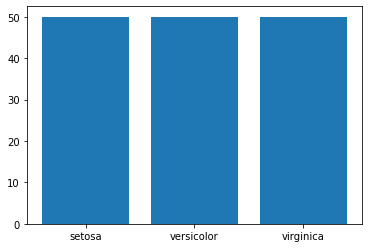

In [37]:
number_species = iris.species.value_counts()
plt.bar(data=number_species, x=number_species.index, height=number_species)
plt.show()
#cách 2: number_species.plot(kind='bar')

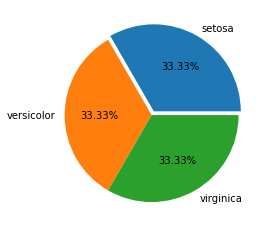

In [32]:
plt.pie(number_species,labels=number_species.index,autopct='%.2f%%', explode=[0.05,0,0])
plt.show()

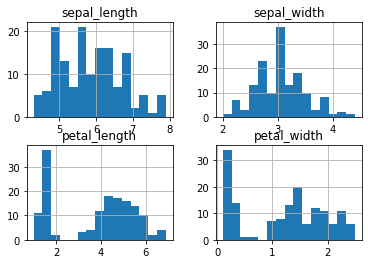

In [41]:
iris.hist(bins=15)
plt.show()

<AxesSubplot:>

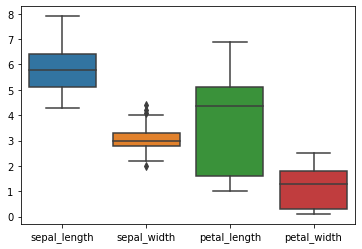

In [42]:
sns.boxplot(data=iris)

<AxesSubplot:>

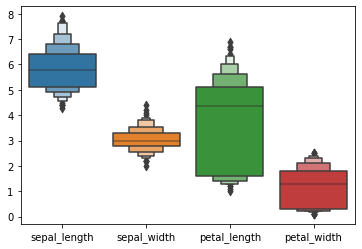

In [43]:
sns.boxenplot(data=iris)

<AxesSubplot:>

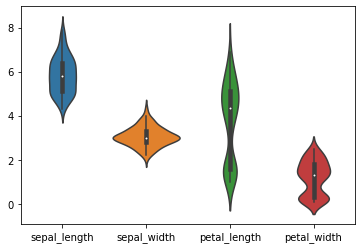

In [45]:
sns.violinplot(data=iris)

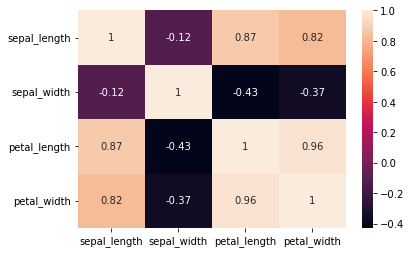

In [49]:
sns.heatmap(iris.corr(),annot=True)
plt.show()

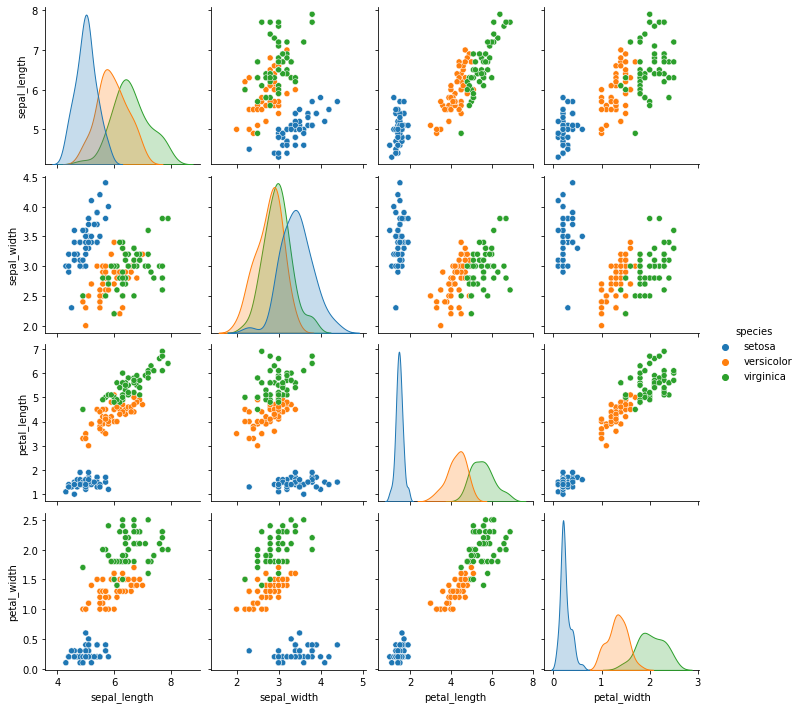

In [51]:
#đánh giá nhanh toàn bộ tập dữ liệu
sns.pairplot(data=iris, hue='species')
plt.show()

### 3. Xây dựng mô hình

#### 3.1 Chia tập huấn luyện và kiểm thử

In [54]:
X_iris = iris.drop('species', axis=1) ##axis =1: xoá cột nhãn => Tập đặc trưng
Y_iris = iris['species'] #nhãn => Tách riêng cột nhãn và cột dữ liệu

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X_iris, Y_iris, test_size=0.2, random_state=42) ##random đúng cái bản ghi chạy lần đầu

In [60]:
#kiểm tra số lượng bản ghi có đúng k
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120, 4), (30, 4), (120,), (30,))

#### 3.2 Huấn luyện mô hình

Hồi quy logistic là phân tích hồi quy thích hợp để tiến hành khi biến phụ thuộc là nhị phân. Giống như tất cả các phân tích hồi quy, hồi quy logistic là một phân tích dự đoán. Về mặt toán học, một mô hình logistic có một biến phụ thuộc với hai giá trị có thể có, chẳng hạn như đạt / không đạt, thắng / thua, sống / chết, ... trong đó hai giá trị được gắn nhãn `0` và `1`.

In [61]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(max_iter=1000) #gán -> fit vào tập huấn luyện #SVM-LinearSVC, LinearRegression, RandomForest, Xgboost
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [66]:
y_model = model.predict(xtest)
y_model

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [68]:
model.predict_proba(xtest)

array([[3.78533158e-03, 8.27196150e-01, 1.69018518e-01],
       [9.46718871e-01, 5.32809290e-02, 2.00190226e-07],
       [8.73202577e-09, 1.55777344e-03, 9.98442218e-01],
       [6.43449455e-03, 7.92105522e-01, 2.01459984e-01],
       [1.44132193e-03, 7.74322521e-01, 2.24236157e-01],
       [9.55770462e-01, 4.42293608e-02, 1.77031340e-07],
       [7.76174602e-02, 9.08070565e-01, 1.43119747e-02],
       [1.61460078e-04, 1.55703864e-01, 8.44134676e-01],
       [2.20833040e-03, 7.62755407e-01, 2.35036262e-01],
       [2.83197881e-02, 9.45783455e-01, 2.58967565e-02],
       [4.39733727e-04, 2.43314823e-01, 7.56245443e-01],
       [9.68308871e-01, 3.16910505e-02, 7.81581763e-08],
       [9.72934845e-01, 2.70651221e-02, 3.33726022e-08],
       [9.62096106e-01, 3.79037833e-02, 1.11051735e-07],
       [9.79265825e-01, 2.07341105e-02, 6.48228605e-08],
       [4.54223854e-03, 7.12622307e-01, 2.82835455e-01],
       [7.22876147e-06, 2.42128145e-02, 9.75779957e-01],
       [2.73343044e-02, 9.47676

In [69]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 3.3 Đánh giá chất lượng mô hình


`accuracy, precision, recall, f1-score => confusion matrix`

- accuracy: (used when the number of labels is balanced) = (TP+TN)/(TP+FP+FN+TN)
- f1-score: 2P*R/(P+R)
- recall: TP ~ FN
- precision: TP ~ FP

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
accuracy_score(ytest, y_model) #=> accuracy = 100%

1.0

In [75]:
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [76]:
confusion_matrix(ytest, y_model)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## III. TRIỂN KHAI VỚI FLASK

Flask là một Web Framework rất nhẹ của Python, dễ dàng giúp người mới bắt đầu học Python có thể tạo ra website nhỏ. Flask cũng dễ mở rộng để xây dựng các ứng dụng web phức tạp. Ngoài Flask Framework, bạn có thể học PYTHON với Django Framework để xây dựng các ứng dụng web lớn hơn. Như đã nêu trước đó, Flask được phân loại là Web Framework siêu nhỏ, nhẹ. Thông thường, một framework vi mô là một framework tối giản hoặc không phụ thuộc vào thư viện bên ngoài.

Để sử dụng Flask, ta cài thư viện sau:
```python
!pip install flask
```

Dưới đây là 1 số câu lệnh để ta làm quen với Flask.

In [77]:
!pip install flask

     |████████████████████████████████| 95 kB 882 kB/s eta 0:00:01
     |████████████████████████████████| 289 kB 4.5 MB/s eta 0:00:01


In [78]:
from flask import Flask

In [80]:
app_test = Flask(__name__)

@app_test.route('/') #return link & show "hello"
def metqua():
    return "hello"
    
if __name__ == '__main__':
    app_test.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Feb/2022 23:25:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Feb/2022 23:25:12] "GET /favicon.ico HTTP/1.1" 404 -
